In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [3]:
dt = pd.concat(pd.read_excel("../data/online_retail_II.xlsx", sheet_name=None).values())
dt.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

## Exploratory data analysis
#### This data set contains of 1067371 entries and 8 columns:
* Invoice: Invoice number. Nominal. A 6-digit integer uniquely assigned to each transaction. If this code begins with the letter 'c' then it indicates cancellation.
* StockCode: Product code (item). Nominal. A 5-digit integer uniquely assigned to each individual product.
* Description: Product name (item). Nominal.
* Quantity: Quantity of each product (item) per transaction. Number.
* InvoiceDate: Invoice date and time. Number. Date and time when the transaction was created.
* Price: Unit price. Number. Product price per unit is in British pounds (£).
* Customer ID: Customer code. Nominal. A 5-digit integer uniquely assigned to each customer.
* Country: Country name. Nominal. Name of the country where the customer resides.

In [4]:
dt.shape

(1067371, 8)

#### Display the first 10 rows of data

In [5]:
dt.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


#### Display 10 random rows of the data to check for cleanliness of the data set

In [6]:
dt.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
379136,525928,22413,METAL SIGN TAKE IT OR LEAVE IT,1,2010-10-07 16:48:00,2.95,16072.0,United Kingdom
483676,577506,20685,DOORMAT RED RETROSPOT,1,2011-11-20 12:40:00,8.25,13212.0,United Kingdom
317009,564757,23287,RED VINTAGE SPOT BEAKER,1,2011-08-30 10:36:00,1.63,NaN,United Kingdom
189649,507388,35970,ZINC FOLKART SLEIGH BELLS,6,2010-05-09 12:12:00,1.69,14474.0,United Kingdom
354532,567882,23309,SET OF 60 I LOVE LONDON CAKE CASES,48,2011-09-22 15:03:00,0.55,12906.0,United Kingdom
322677,520825,21738,COSY SLIPPER SHOES SMALL RED,2,2010-08-31 12:35:00,2.95,14433.0,United Kingdom
453760,532494,22531,MAGIC DRAWING SLATE CIRCUS PARADE,2,2010-11-12 11:47:00,0.42,14082.0,United Kingdom
110066,499968,21082,SET/20 FRUIT SALAD PAPER NAPKINS,12,2010-03-03 14:10:00,0.85,13214.0,United Kingdom
72163,495936,21162,TOXIC AREA DOOR HANGER,12,2010-01-27 15:39:00,1.45,17865.0,United Kingdom
169855,551268,22719,GUMBALL MONOCHROME COAT RACK,1,2011-04-27 12:08:00,1.25,16965.0,United Kingdom


#### What we can observe from this is that there are missing values in **CustomerID** column. Upon further inspection with the *.info()* function, we can see that there are also missing values in the **Description** column

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


#### In fact, almost 20% of the rows are missing with **CustomerID** values which is a huge number and can greatly affect the result of this analysis. Another problem is that the data type of **CustomerID** should be int with 5 digits rather that float type. Aside from that, the data seems to be cleaned.

#### We then use the *.describe()* funtion to show the summary statistics such as *mean, median, quarticles,...* for the numerical columns, specifically the **Quantity** and the **Price** columns. These 2 columns have the minimum values to be negative which is impossible siince you cannot than 0 items or/and for negative price.

In [8]:
dt[["Quantity", "Price"]].describe()

,Quantity,Price
count,1.067371e+06,1.067371e+06
mean,9.938898e+00,4.649388e+00
std,1.727058e+02,1.235531e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


#### We then move to the non-numerical columns with unique values which is the **Country** column. The functions return 43 indicates that there are 43 countries in this column and most of them are from Europe.

In [9]:
dt["Country"].nunique()

43

In [10]:
dt["Country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

#### Almost 92% of the transaction are coming from United Kingdom.

In [11]:
dt["Country"].value_counts(normalize=True).head(10) * 100

Country
United Kingdom    91.938979
EIRE               1.673832
Germany            1.651160
France             1.342551
Netherlands        0.481557
Spain              0.357045
Switzerland        0.298771
Belgium            0.292588
Portugal           0.245463
Australia          0.179225
Name: proportion, dtype: float64

#### There are some missing values in column **Description** and **CustomerID**. 

#### We will start dealing with the missing values in **Description** column.

In [12]:
dt["Description"].isnull().mean() * 100

0.4105414143723223

#### 0.41% of the **Description** column have missing values.

In [13]:
dt[dt["Description"].isnull()].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
142006,548538,90082B,NaN,3,2011-03-31 17:36:00,0.0,NaN,United Kingdom
82266,496942,84425A,NaN,9,2010-02-04 17:22:00,0.0,NaN,United Kingdom
184329,506955,16050,NaN,-843,2010-05-05 11:45:00,0.0,NaN,United Kingdom
81146,496857,21104,NaN,-5,2010-02-04 11:50:00,0.0,NaN,United Kingdom
21553,538092,37467,NaN,-177,2010-12-09 14:49:00,0.0,NaN,United Kingdom
383714,526253,22692,NaN,2,2010-10-11 10:24:00,0.0,NaN,United Kingdom
82420,496958,85207B,NaN,-7,2010-02-04 19:09:00,0.0,NaN,United Kingdom
166508,550926,22469,NaN,8,2011-04-21 14:39:00,0.0,NaN,United Kingdom
88564,497718,35837,NaN,-15,2010-02-11 18:09:00,0.0,NaN,United Kingdom
307124,519375,21900,NaN,-1520,2010-08-16 13:28:00,0.0,NaN,United Kingdom


#### Upon inspecting the first 10 rows of the rows that contain NaN values in **Description** column, it seams like the rows containing missing values in **Description** column also have negative values for **Quantity**, alot of 0.0 for **Price** and missing values for **CustomerID**

#### We will further inspect this bit of data by diving deeper into the above thesis.

In [14]:
np.all(dt[dt["Description"].isnull()]["Customer ID"].isnull())

True

#### All of the NaN value **Description** rows also have NaN value for their corresponding **CustomerID**.

In [15]:
(dt[dt["Description"].isnull()]["Quantity"] <= 0).mean() * 100

61.364673664993155

#### Around 61% of the NaN value **Description** rows have the **Quantity** of equal or less than 0.

In [16]:
all(dt[dt["Description"].isnull()]["Country"] == "United Kingdom")

True

#### All of the NaN value **Description** rows are correspoding to the **Country** United Kingdom.

In [17]:
all(dt[dt["Description"].isnull()]["Price"] == 0.0)

True

#### All of the NaN value **Description** rows have the price of 0.0

#### Now we will proceed to deal with missing values in **CustomerID** column.

In [18]:
dt["Customer ID"].isnull().mean() * 100

22.766872999172733

#### Around 23% of **CustomerID** rows are absence with values.

In [19]:
dt[dt["Customer ID"].isnull()].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
478368,577078,22556,PLASTERS IN TIN CIRCUS PARADE,2,2011-11-17 15:17:00,3.29,NaN,United Kingdom
114061,546007,22352,LUNCH BOX WITH CUTLERY RETROSPOT,1,2011-03-08 15:34:00,4.96,NaN,United Kingdom
260767,559816,22616,PACK OF 12 LONDON TISSUES,5,2011-07-12 16:11:00,0.83,NaN,United Kingdom
322801,520833,35961,FOLKART ZINC HEART CHRISTMAS DEC,2,2010-08-31 12:41:00,1.66,NaN,United Kingdom
437627,574298,22866,HAND WARMER SCOTTY DOG DESIGN,1,2011-11-03 15:56:00,4.13,NaN,United Kingdom
261825,514663,21777,RECIPE BOX WITH METAL HEART,2,2010-07-05 13:01:00,7.95,NaN,United Kingdom
256949,514198,20618,QUEEN OF THE SKIES PASSPORT COVER,2,2010-06-30 15:55:00,4.21,NaN,United Kingdom
318080,564820,22629,SPACEBOY LUNCH BOX,1,2011-08-30 12:16:00,4.13,NaN,United Kingdom
326255,521202,21790,VINTAGE SNAP CARDS,1,2010-09-02 17:52:00,1.66,NaN,United Kingdom
222842,556459,23226,FILIGREE HEART DAISY WHITE,1,2011-06-10 17:25:00,2.46,NaN,United Kingdom


In [20]:
dt[dt["Customer ID"].isnull()]["Description"].nunique()

4872

In [21]:
(dt[dt["Customer ID"].isnull()]["Quantity"] <= 0).mean() * 100

1.7308143386816017

In [22]:
(dt[dt["Customer ID"].isnull()]["Price"] <= 0.0).mean() * 100

2.5250301431646003

#### There are no obvious pattern for why there are missing values in **CustomerID** column

#### Next we will analyze the negative values of **Quantity** and **Price** columns

In [23]:
(dt["Price"] <= 0).mean() * 100

0.5815222635803297

In [24]:
(dt["Quantity"] <= 0).mean() * 100

2.1501427338760375

#### Around 0.6% of **Price** values are missing and 2.1% of **Quatity**  values are missing 

In [25]:
dt[dt["Quantity"] <= 0].sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
239040,C512529,22097,SWALLOW SQUARE TISSUE BOX,-5,2010-06-16 11:55:00,1.25,15207.0,United Kingdom
310755,C519679,20676,RED SPOTTY BOWL,-8,2010-08-19 12:37:00,1.25,16278.0,United Kingdom
292518,C517885,POST,POSTAGE,-1,2010-08-03 08:37:00,2.98,15704.0,United Kingdom
91248,C497964,44217M,MULTICOLOUR FEATHERS CURTAIN,-48,2010-02-15 13:27:00,2.95,16544.0,United Kingdom
507365,C579178,22941,CHRISTMAS LIGHTS 10 REINDEER,-2,2011-11-28 14:55:00,8.50,12362.0,Belgium
272157,560737,84798B,NaN,-109,2011-07-20 15:34:00,0.00,NaN,United Kingdom
5235,C536850,22580,ADVENT CALENDAR GINGHAM SACK,-48,2010-12-03 09:47:00,4.95,14213.0,United Kingdom
197255,C508302,21068,VINTAGE BILLBOARD LOVE/HATE MUG,-2,2010-05-14 11:11:00,1.25,17612.0,United Kingdom
391026,C527020,21977,PACK OF 60 PINK PAISLEY CAKE CASES,-24,2010-10-14 11:52:00,0.55,12589.0,France
209598,C555256,22776,SWEETHEART CAKESTAND 3 TIER,-1,2011-06-01 15:21:00,9.95,15955.0,United Kingdom


In [26]:
dt[dt["Quantity"] <= 0]["Invoice"].astype("str").str.startswith("C").mean() * 100

84.93681917211329

In [27]:
(dt[dt["Invoice"].astype("str").str.startswith("C")]["Quantity"] <= 0.).mean() * 100

99.99487021647685

#### By taking a look at the **Invoice** column, there is a C at the beginning in most of the values. Which can be understanded that these orders were cancelled.

#### Next, we will create an additional column called **TotalPrice** calculated by **Quantity** multiplied by **Price**. Rows with the **TotalPrice** equal or less than 0 will be dropped.

In [28]:
dt["TotalPrice"] = dt["Quantity"] * dt["Price"]

In [29]:
(dt["TotalPrice"] <= 0).mean() * 100

2.4077851093949527

#### Around 2.4% of the data consist of rows that have the total price equal or less than 0.

In [30]:
dt[dt["TotalPrice"] <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


#### There are approximately 25700 rows that will be dropped to clean the data.

#### Next, we will proceed to remove all the rows with TotalPrice < 0 and rows containing missing values in **Description**. We will also remove cancelled orders except for 1.

In [31]:
all(~dt[dt["TotalPrice"] > 0]["Description"].isnull())

True

In [32]:
dt[(dt["Invoice"].astype("str").str.startswith("C")) & (dt["TotalPrice"] > 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom,373.57


#### At this point, the data is cleaned and ready for further analysis.

#### Let's now create a function that loads the data, and filter out rows with negative TotalPrice and cancelled orders. There is an argument in the function of keep rows with missing values in the Customer ID column.

In [33]:
def load_dt(sheet_name="Year 2009-2010", keepna=True):
    
    dt = pd.read_excel("../data/online_retail_II.xlsx", 
                       sheet_name=sheet_name, 
                       parse_dates=["InvoiceDate"],
                       dtype={"Invoice": "str", "StockCode": "str"})
    
    if isinstance(dt, dict):
        dt = pd.concat(dt.values())
    
    dt["TotalPrice"] = dt["Quantity"] * dt["Price"]
    dt = dt.query("TotalPrice > 0")
    dt = dt[~dt["Invoice"].str.startswith("C")]
    dt = dt[~dt["StockCode"].str.contains("TEST")]
    
    if not keepna:
        dt.dropna(inplace = True)
        
    dt.drop_duplicates(inplace=True)
        
    assert all(dt["InvoiceDate"] > datetime(2009,1,1))
    assert all(dt["InvoiceDate"] < datetime(2012,1,1))
    
    return dt

In [34]:
dt = load_dt(None)

In [35]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007903 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1007903 non-null  object        
 1   StockCode    1007903 non-null  object        
 2   Description  1007903 non-null  object        
 3   Quantity     1007903 non-null  int64         
 4   InvoiceDate  1007903 non-null  datetime64[ns]
 5   Price        1007903 non-null  float64       
 6   Customer ID  779415 non-null   float64       
 7   Country      1007903 non-null  object        
 8   TotalPrice   1007903 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 76.9+ MB


# Feature engineering

We can see that there are many customers who do not have a **Customer ID** so we cannot track them, but first we can track the products that are sold in the highest quantity and the products that bring in the highest total revenue.

In [52]:
dt['TotalPrice'] = dt['Price'] * dt['Quantity']
dt.sample(7)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
119494,546545,22981,PANTRY APPLE CORER,1,2011-03-14 15:48:00,1.45,16804.0,United Kingdom,1.45
25184,491474,72756,FAIRY CAKE CANDLES,36,2009-12-11 12:09:00,1.49,14577.0,United Kingdom,53.64
441424,531468,22147,FELTCRAFT BUTTERFLY HEARTS,6,2010-11-08 13:58:00,1.45,14821.0,United Kingdom,8.70
495846,578326,21914,BLUE HARMONICA IN BOX,1,2011-11-23 17:45:00,1.25,16343.0,United Kingdom,1.25
450481,532159,21967,PACK OF 12 SKULL TISSUES,24,2010-11-11 12:18:00,0.29,16945.0,United Kingdom,6.96
208316,555109,23175,REGENCY MILK JUG PINK,4,2011-05-31 14:19:00,3.25,16023.0,United Kingdom,13.00
144969,503185,22251,BIRDHOUSE DECORATION MAGIC GARDEN,3,2010-03-30 14:29:00,2.51,NaN,United Kingdom,7.53


As the statistics show, the product **WORLD WAR 2 GLIDERS ASSTD DESIGNS** is sold in the largest quantity with more than 100k but the product with the highest total revenue is **Manual** with only 9634 products but bringing in more than 330k pounds.

In [40]:
# Group by 'Description' and sum up the 'Quantity' for each product
products_by_quantity = dt.groupby('Description').agg({'Quantity': 'sum'})

# Sort the products by 'Quantity' in descending order
products_by_quantity = products_by_quantity.sort_values(by='Quantity', ascending=False)

# Reset the index to make 'Description' a column
products_by_quantity = products_by_quantity.reset_index()

# Display the result
products_by_quantity


,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
1,WHITE HANGING HEART T-LIGHT HOLDER,94658
2,"PAPER CRAFT , LITTLE BIRDIE",80995
3,ASSORTED COLOUR BIRD ORNAMENT,80082
4,MEDIUM CERAMIC TOP STORAGE JAR,78033
...,...,...
5393,ROSE PINK PENDANT SHELL NECKLACE,1
5394,FEATHER HEART LIGHTS,1
5395,6 HOOK JEWEL STAND LILAC DRESS,1
5396,DADDY MOUSE RED GINGHAM BOW TIE,1


In [51]:


# Group by 'Description' and calculate both total quantity and total price
products_summary = dt.groupby('Description').agg({'Quantity': 'sum', 'TotalPrice': 'sum'})

# Sort the products by 'TotalPrice' in descending order
products_summary = products_summary.sort_values(by='TotalPrice', ascending=False)

# Reset the index to make 'Description' a column
products_summary = products_summary.reset_index()

# Display the sorted table
products_summary






,Description,Quantity,TotalPrice
0,Manual,9634,339241.290
1,REGENCY CAKESTAND 3 TIER,26478,330590.320
2,DOTCOM POSTAGE,1415,309854.110
3,WHITE HANGING HEART T-LIGHT HOLDER,94658,260990.220
4,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.600
...,...,...,...
5393,CAT W SUNGLASSES BLANK CARD,4,0.760
5394,SET 12 COLOURING PENCILS DOILEY,1,0.650
5395,PINK HEART CHRISTMAS DECORATION,1,0.380
5396,HAPPY BIRTHDAY GINGER CAT CARD,2,0.380


Let's examine the products with the highest price purchased by known and unknown customers, we see that unknown customers can pay a much higher price for the same product than known customers and the value of unknown customers' products is also the same. 3 times higher than known customers. From there we see the tendency of unknown customers to pay higher prices as well as buy more expensive products.

In [ ]:
orders_without_customer_id = dt[dt['Customer ID'].isna()]
orders_with_customer_id = dt[dt['Customer ID'].notna()]

top_5_without_customer_id = orders_without_customer_id.nlargest(5, 'Price')
top_5_with_customer_id = orders_with_customer_id.nlargest(5, 'Price')

top_5_combined = pd.concat([top_5_without_customer_id, top_5_with_customer_id], keys=['Without Customer ID', 'With Customer ID'])

top_5_combined = top_5_combined.reset_index(level=0).rename(columns={'level_0': 'Customer ID Status'})

top_5_combined



,Customer ID Status,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,CustomerType
241827,Without Customer ID,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom,25111.09,Unknown
517955,Without Customer ID,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33,Unknown
299982,Without Customer ID,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,Unknown
135015,Without Customer ID,502265,M,Manual,1,2010-03-23 15:28:00,10953.50,NaN,United Kingdom,10953.50,Unknown
342147,Without Customer ID,522796,M,Manual,1,2010-09-16 15:12:00,10468.80,NaN,United Kingdom,10468.80,Unknown
135013,With Customer ID,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,10953.50,Known
358639,With Customer ID,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063.0,United Kingdom,10468.80,Known
74356,With Customer ID,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.0,United Kingdom,8985.60,Known
173382,With Customer ID,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,Known
129903,With Customer ID,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760.0,Norway,6958.17,Known


In [60]:

dt['CustomerType'] = dt['Customer ID'].notna().map({True: 'Known', False: 'Unknown'})

average_price_per_product = dt.groupby('CustomerType').apply(
    lambda x: (x['TotalPrice'].sum() / x['Quantity'].sum())
).reset_index(name='AvgPricePerProduct')

average_price_per_product




C:\Users\Weirdle Crab\AppData\Local\Temp\ipykernel_16572\778299735.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_price_per_product = dt.groupby('CustomerType').apply(


,CustomerType,AvgPricePerProduct
0,Known,1.652534
1,Unknown,4.487086


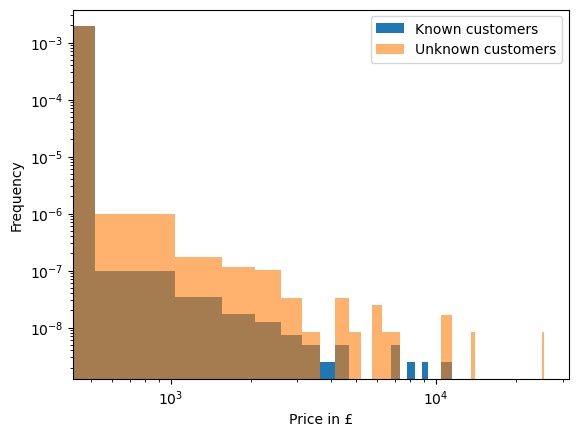

In [62]:
bounds=(0, 26000)
bins=50
ax = dt.dropna()["Price"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = dt[dt["Customer ID"].isnull()]["Price"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, 
                                                 label="Unknown customers")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

In [63]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

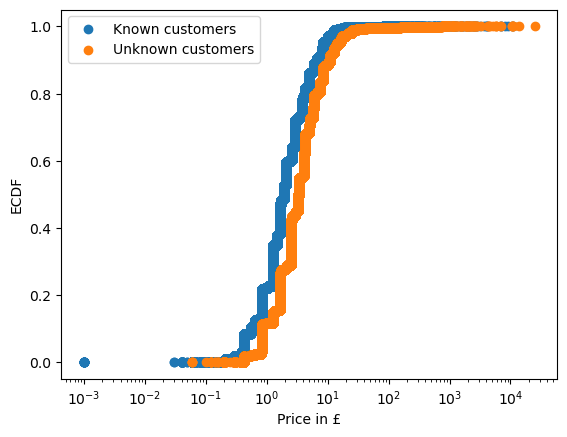

In [65]:
price_known = dt.dropna()["Price"].values
price_unknown = dt[dt["Customer ID"].isnull()]["Price"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(price_known), label="Known customers")
ax.scatter(*ecdf(price_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

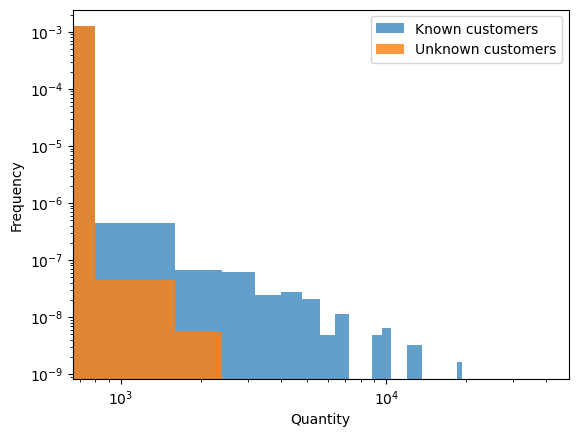

In [67]:
bounds=(0, 40000)
bins=50
ax = dt.dropna()["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers", alpha=0.7)
_ = dt[dt["Customer ID"].isnull()]["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, 
                                                    label="Unknown customers", alpha=0.8)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Quantity")
_ = ax.legend()

Non-subscribed customers tend to focus on expensive but low-volume products and vice versa for registered customers. And finally, unregistered customers tend to pay higher bills per invoice than registered customers

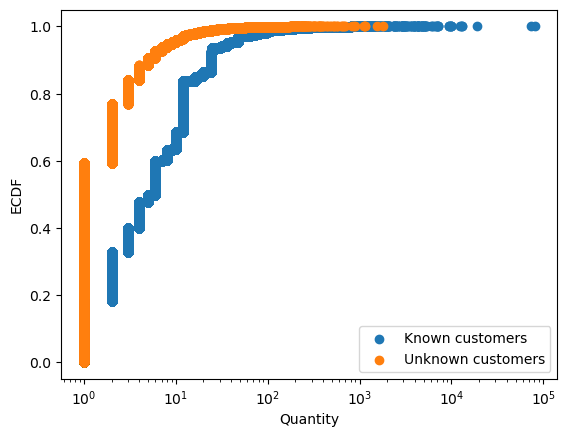

In [68]:
quant_known = dt.dropna()["Quantity"].values
quant_unknown = dt[dt["Customer ID"].isnull()]["Quantity"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(quant_known), label="Known customers")
ax.scatter(*ecdf(quant_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Quantity")
ax.legend()

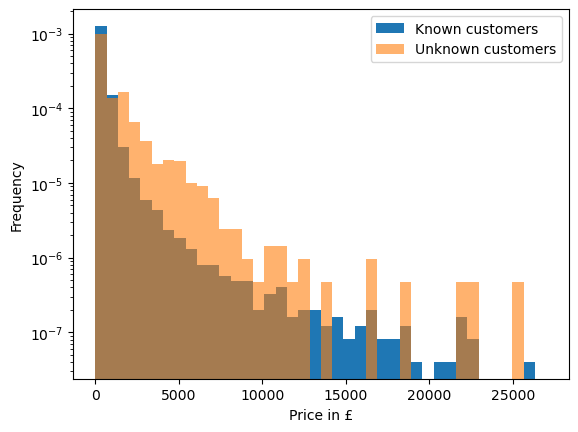

In [69]:
df_inv = dt.dropna().groupby("Invoice").agg({"TotalPrice": "sum", "Quantity":"sum"})
df_inv_na = dt[dt["Customer ID"].isnull()].groupby("Invoice").agg({"TotalPrice": "sum", "Quantity":"sum"})

bounds=(0, 27000)
bins=40
ax = df_inv["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = df_inv_na["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, label="Unknown customers")
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

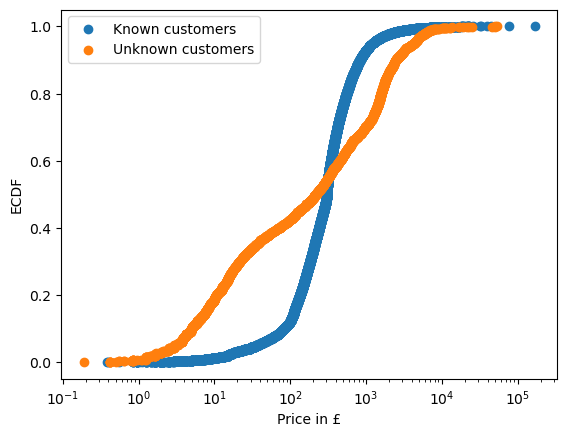

In [85]:
totprice_known = dt.dropna().groupby("Invoice")["TotalPrice"].sum().values
totprice_unknown = dt[dt["Customer ID"].isnull()].groupby("Invoice")["TotalPrice"].sum().values

f, ax = plt.subplots()
ax.scatter(*ecdf(totprice_known), label="Known customers")
ax.scatter(*ecdf(totprice_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

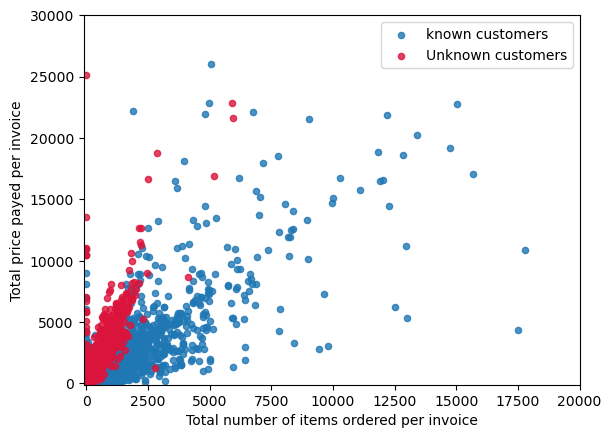

In [87]:
ax = df_inv.plot(kind="scatter", x="Quantity", y="TotalPrice", alpha=0.8, label="known customers")
df_inv_na.plot(kind="scatter", x="Quantity", y="TotalPrice", ax=ax, color="crimson", alpha=0.8, label="Unknown customers")
ax.set_ylim(-100, 30000)
ax.set_xlim(-100, 20000)
ax.set_ylabel("Total price payed per invoice")
ax.set_xlabel("Total number of items ordered per invoice")
_ = ax.legend()

Customers tend to buy more in the last months of the year and this is true for both registered and non-registered customers.

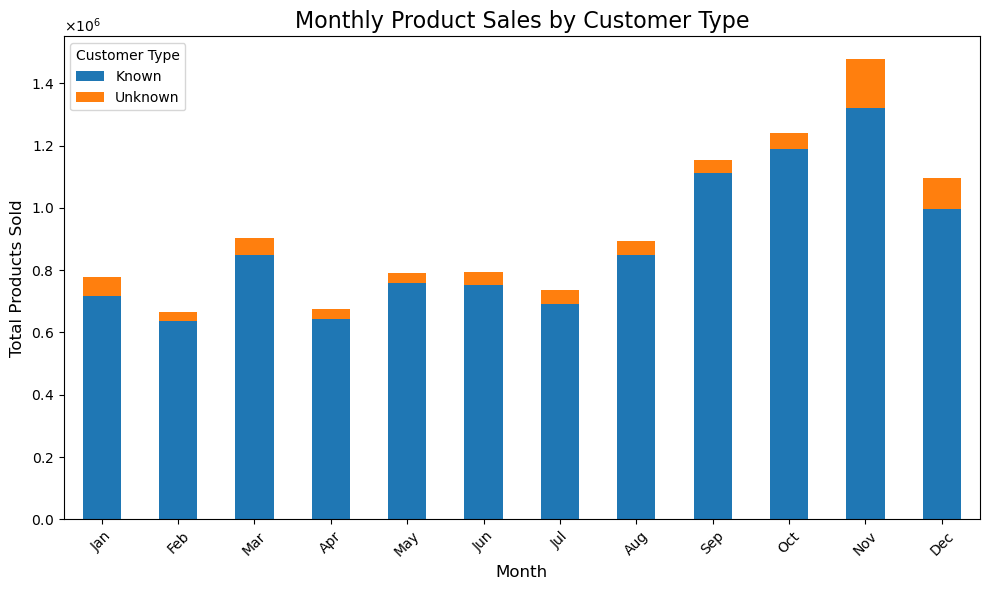

In [79]:


ax = monthly_sales.T.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title("Monthly Product Sales by Customer Type", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Products Sold", fontsize=12)
plt.legend(title="Customer Type", fontsize=10)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)

formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)

ax.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))

plt.tight_layout()
plt.show()


As shown in the plot below, we can see that almost all orders and revenue come from the **United Kingdom**

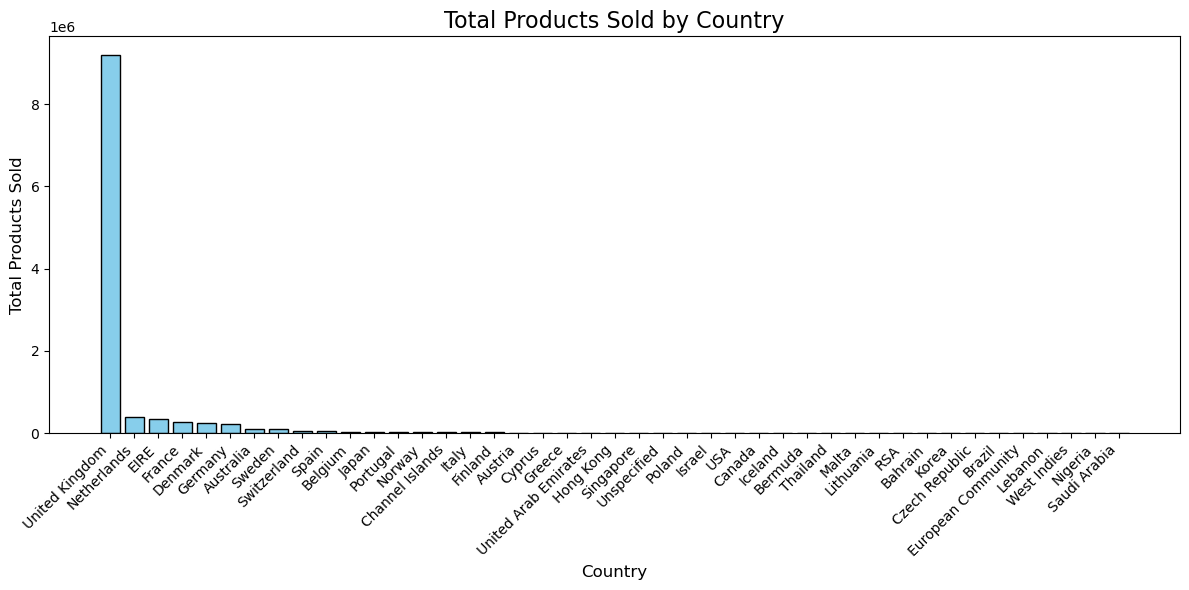

In [82]:

products_by_country = dt.groupby('Country').agg({'Quantity': 'sum'}).reset_index()

# Sort by total quantity for better visualization
products_by_country = products_by_country.sort_values(by='Quantity', ascending=False)

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(products_by_country['Country'], products_by_country['Quantity'], color='skyblue', edgecolor='black')
plt.title("Total Products Sold by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Products Sold", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()


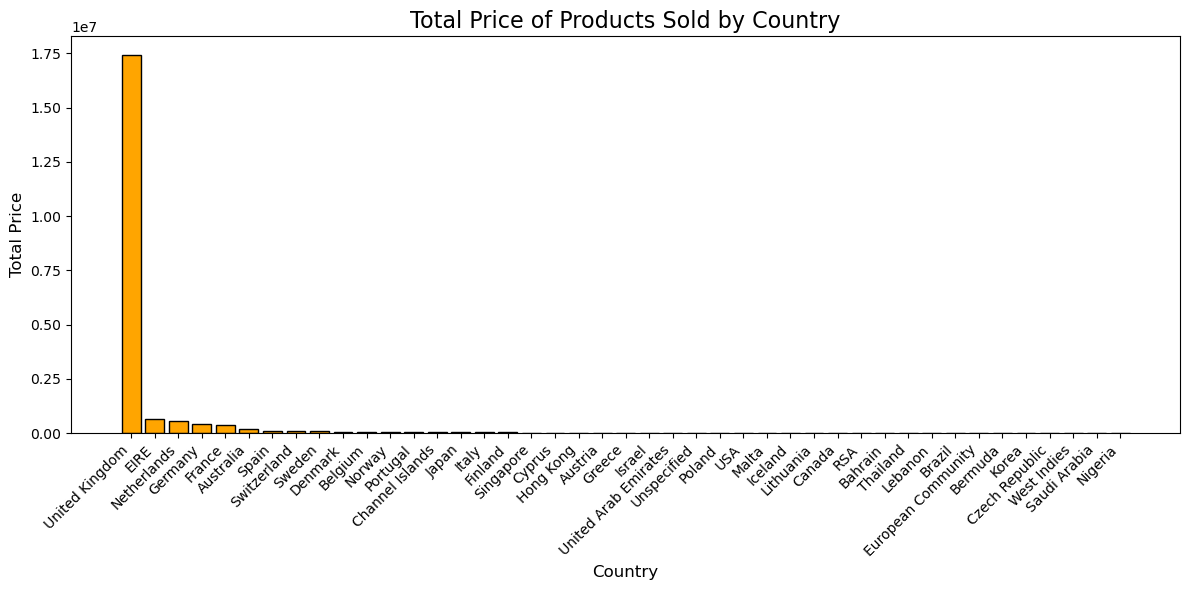

In [83]:


# Group by 'Country' and calculate the total price of products sold
total_price_by_country = dt.groupby('Country').agg({'TotalPrice': 'sum'}).reset_index()

# Sort by total price for better visualization
total_price_by_country = total_price_by_country.sort_values(by='TotalPrice', ascending=False)

# Plot the data as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(total_price_by_country['Country'], total_price_by_country['TotalPrice'], color='orange', edgecolor='black')
plt.title("Total Price of Products Sold by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Price", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show()
